In [14]:
# Install the emoji library if not already installed
!pip install emoji

# Import necessary libraries
import re
from transformers import pipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import emoji
import pandas as pd
import matplotlib.pyplot as plt  # <-- Make sure this line is included


In [15]:
from transformers import pipeline

# Load the sentiment analysis pipeline using RoBERTa
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Define the file path to your WhatsApp chat
file_path = '/content/whatsApp sentiment.txt'

# Read the file and analyze each line
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Iterate over each line and perform sentiment analysis
for line in lines:
    if line.strip():  # Skip empty lines
        sentiment = sentiment_analyzer(line.strip())[0]
        label = sentiment['label']

        # Convert RoBERTa's output to a more descriptive label
        if label == 'LABEL_0':
            sentiment_label = 'Negative'
        elif label == 'LABEL_1':
            sentiment_label = 'Neutral'
        elif label == 'LABEL_2':
            sentiment_label = 'Positive'

        print(f"Message: {line.strip()}")
        print(f"Sentiment: {sentiment_label}, Confidence: {sentiment['score']:.2f}")
        print()

Message: 8/14/24, 8:50 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
Sentiment: Neutral, Confidence: 0.56

Message: 8/14/24, 8:43 AM - Purna created group "Project"
Sentiment: Neutral, Confidence: 0.90

Message: 8/14/24, 8:43 AM - Purna added you
Sentiment: Neutral, Confidence: 0.91

Message: 8/14/24, 4:10 PM - Purna: Hey Teja! How's your day going?
Sentiment: Neutral, Confidence: 0.91

Message: 8/14/24, 4:12 PM - Tejaswini: Hey Purna! Not too bad, just got back from work. You?
Sentiment: Positive, Confidence: 0.87

Message: 8/14/24, 4:12 PM - Purna: Pretty good.I aced my presentation today. Feeling ecstatic! <This message was edited>
Sentiment: Positive, Confidence: 0.99

Message: 8/14/24, 4:14 PM - Tejaswini: That's awesome! Congrats!
Sentiment: Positive, Confidence: 0.99

Message: 8/14/24, 4:14 PM - Purna: Thanks! Wanna grab dinner tonight to celebrate?
Sentiment: Positive, Confidence:

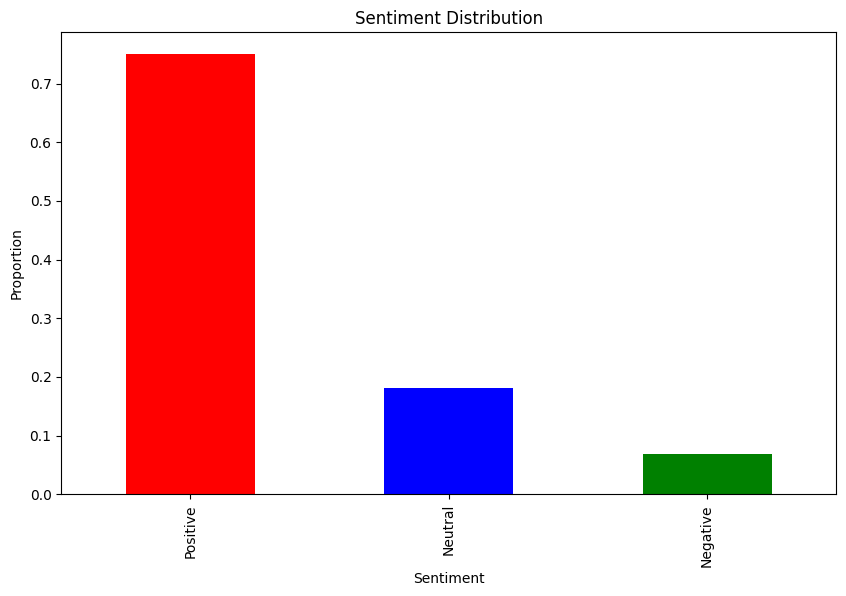

In [21]:
# Install the necessary libraries if not already installed
!pip install emoji
!pip install transformers
!pip install torch
!pip install wordcloud

# Import necessary libraries
import re
from transformers import pipeline
import emoji
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the sentiment analysis pipeline using RoBERTa
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Load an emotion detection model
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Handle emojis
    text = emoji.demojize(text)
    return text

# Define the file path to your WhatsApp chat
file_path = '/content/whatsApp sentiment.txt'

# Read the file and analyze each line
messages_data = []
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Iterate over each line and perform sentiment and emotion analysis
for line in lines:
    if line.strip():  # Skip empty lines
        preprocessed_text = preprocess_text(line.strip())

        # Perform sentiment analysis
        sentiment = sentiment_analyzer(preprocessed_text)[0]
        label = sentiment['label']

        # Convert RoBERTa's output to a more descriptive label
        if label == 'LABEL_0':
            sentiment_label = 'Negative'
        elif label == 'LABEL_1':
            sentiment_label = 'Neutral'
        elif label == 'LABEL_2':
            sentiment_label = 'Positive'

        # Perform emotion analysis
        emotion = emotion_analyzer(preprocessed_text)[0]['label']

        # Message length
        message_length = len(preprocessed_text.split())

        # Include the original and processed text in the analysis
        messages_data.append({
            "Original Message": line.strip(),
            "Processed Message": preprocessed_text,
            "Sentiment": sentiment_label,
            "Confidence": sentiment['score'],
            "Message Length": message_length,
            "Emotion": emotion
        })

# Convert the data into a DataFrame for further analysis
df = pd.DataFrame(messages_data)

# Filter messages based on confidence threshold
confidence_threshold = 0.75
df_filtered = df[df['Confidence'] >= confidence_threshold]

# Sentiment distribution visualization
sentiment_distribution = df_filtered['Sentiment'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(10, 6))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()


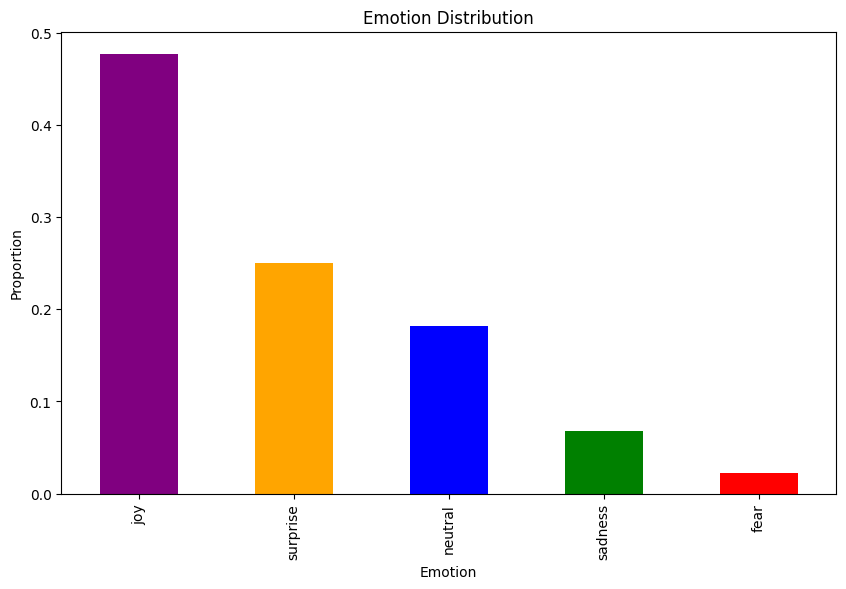

In [22]:
# Emotion distribution visualization
emotion_distribution = df_filtered['Emotion'].value_counts(normalize=True)
emotion_distribution.plot(kind='bar', color=['purple', 'orange', 'blue', 'green', 'red'], figsize=(10, 6))
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Proportion")
plt.show()

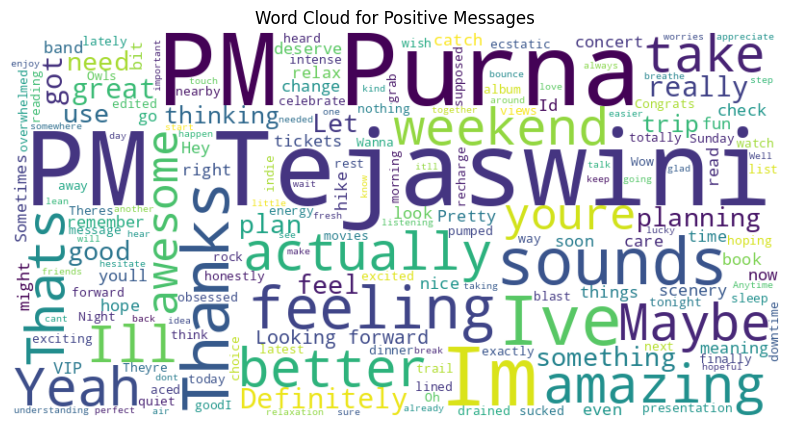

In [23]:
# Word cloud of most common words in Positive messages
positive_text = " ".join(df_filtered[df_filtered['Sentiment'] == 'Positive']['Processed Message'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Messages")
plt.show()

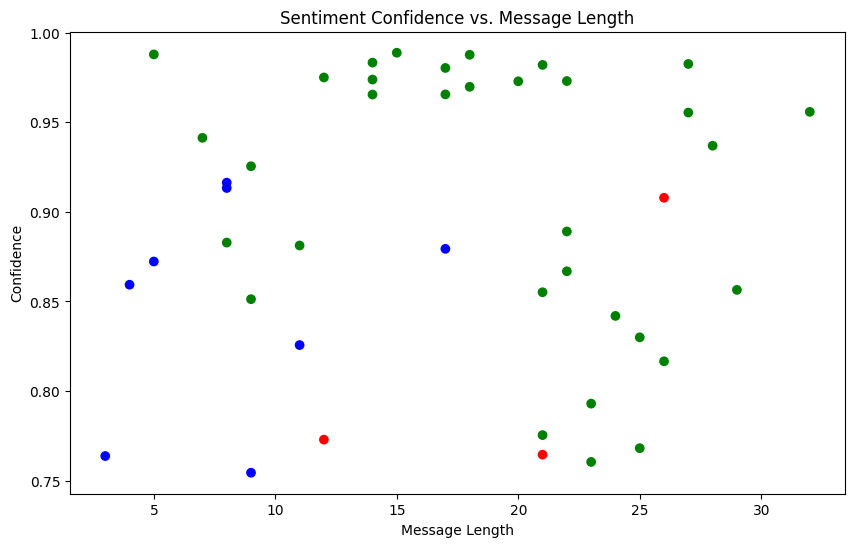

In [19]:
# Scatter plot: Sentiment vs. Message Length
colors = {'Negative':'red', 'Neutral':'blue', 'Positive':'green'}
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Message Length'], df_filtered['Confidence'], c=df_filtered['Sentiment'].map(colors))
plt.title("Sentiment Confidence vs. Message Length")
plt.xlabel("Message Length")
plt.ylabel("Confidence")
plt.show()

In [20]:
# Display the first few rows of the DataFrame for verification
print(df_filtered.head(10))

                                     Original Message  \
1    8/14/24, 8:43 AM - Purna created group "Project"   
2                  8/14/24, 8:43 AM - Purna added you   
3   8/14/24, 4:10 PM - Purna: Hey Teja! How's your...   
5   8/14/24, 4:12 PM - Purna: Pretty good.I aced m...   
6   8/14/24, 4:14 PM - Tejaswini: That's awesome! ...   
7   8/14/24, 4:14 PM - Purna: Thanks! Wanna grab d...   
10  8/14/24, 4:15 PM - Tejaswini: Thanks. This col...   
12  8/14/24, 4:16 PM - Tejaswini: Will do. By the ...   
13  8/14/24, 4:16 PM - Purna: Yeah, heard it's ama...   
14  8/14/24, 4:17 PM - Tejaswini: Definitely! Look...   

                                    Processed Message Sentiment  Confidence  \
1                     AM  Purna created group Project   Neutral    0.872317   
2                                 AM  Purna added you   Neutral    0.859359   
3              PM  Purna Hey Teja Hows your day going   Neutral    0.913364   
5     PM  Purna Pretty goodI aced my presentation ...  P